In [1]:
!pwd

/home/varo/Documents/SPICED_Academy/allspice-arrays-code/Week_I


## `Animated scatter plot (Alvaro)`

**Special note:** This notebook does not exactly follow the logic of the excercise as stated in the tutorial. Although, it fullfils the request.

###  Step 1. Load files and explore their contents

In [12]:
import pandas as pd

#load data set 1
fert = pd.read_csv('../data/gapminder_total_fertility.csv')
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx')
pop = pd.read_excel('../data/gapminder_population.xlsx')


### Step 2. Set the indexes to something meaningful 

In [13]:
fert = fert.set_index('Total fertility rate')
life = life.set_index('Life expectancy').drop(labels=2016, axis=1) 
pop = pop.set_index('Total population')

### Step 3. Get the dimensions of the data frames

In [14]:
print(fert.shape)
print(life.shape)
print(pop.shape)

(260, 216)
(260, 216)
(275, 81)


### Step 4. Explore the information and reorganize the DataFrames based on their column's information

4.1. Print columns present in both DataFrame(s).

4.2. While one DataFrame has integers as name colon, the other one has strings. To be able to merge the table you need both on the same format.

4.3. Use this new columns list as the new columns 

In [15]:
# 4.1. Print columns
print("fert columns", fert.columns) 
print("life columns", life.columns)
print("pop columns", pop.columns)

fert columns Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)
life columns Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype='object', length=216)
pop columns Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910,
       1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
      dtype=

In [16]:
# 4.2. Get columns as integers from the fert DataFrame
ncol1 = [int(x) for x in life.columns] 
ncol2 = [x for x in pop.columns]

In [17]:
# 4.3. new columns assignment 
fert.set_axis(axis=1, labels=ncol1, inplace=True)
life.set_axis(axis=1, labels=ncol1, inplace=True)
pop.set_axis(axis=1, labels=ncol2, inplace=True)

In [18]:
fert.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 5
To obtain nice column names, you can also create a hierarchical index. For that, we convert both tables to the long format:

In [19]:
sfert = fert.stack()
slife = life.stack()
spop = pop.stack()

###### The variables sfert and slife now have the type pd.Series. Multiple Series can be converted to a pd.DataFrame, using a dictionary with the values:

In [21]:
d = {'fertility': sfert, 'lifeExp': slife, 'growth':spop}
df1 = pd.DataFrame(data=d)
df1.head(2)

fertility  lifeExp     growth
Afghanistan 1800        7.0    28.21  3280000.0
            1801        7.0    28.20        NaN

### Step 6. 
**Note:** This step was integrated in **steps 1-5**. 

### Step 7. Interpret all indices (rows and columns) as row indices:

In [22]:
# stack the DataFrame (convert it into a long DataFrame)
df2 = df1.stack()
print(df2)

Afghanistan  1800  fertility          7.00
                   lifeExp           28.21
                   growth       3280000.00
             1801  fertility          7.00
                   lifeExp           28.20
                                   ...    
Åland        2006  growth         26923.00
             2007  growth         26923.00
             2008  growth         26923.00
             2009  growth         26923.00
             2010  growth         26923.00
Length: 107237, dtype: float64


In [37]:
# Unstack it, convert it to a wide DataFrame, by country and demographic values
df3 = df2.unstack((0,2)) # 0 stands for first element of an index (country)
                         # 2 Stands for third element (Demography column). 
df3.head(3)

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeExp     growth                growth fertility lifeExp   
1800         7.0   28.21  3280000.0                   NaN       4.6    35.4   
1801         7.0   28.20        NaN                   NaN       4.6    35.4   
1802         7.0   28.19        NaN                   NaN       4.6    35.4   

                 Algeria                     ...      Yemen Yugoslavia  \
        growth fertility lifeExp     growth  ...     growth     growth   
1800  410445.0      6.99   28.82  2503218.0  ...  2593000.0        NaN   
1801       NaN      6.99   28.82        NaN  ...        NaN        NaN   
1802       NaN      6.99   28.82        NaN  ...        NaN        NaN   

        Zambia                    Zimbabwe                     Åland          
     fertility lifeExp    growth fertility lifeExp     growth growth lifeExp  
1800      6.71    32.6  747000.0      6.75    33.7  1085814.0    NaN     NaN  
1801      6.71    32.6       NaN      6.75    33.7        NaN    NaN     NaN  
1802      6.71    32.6       NaN      6.75    33.7        NaN    NaN     NaN  

[3 rows x 667 columns]

### Step 8. Select and plot specific columns

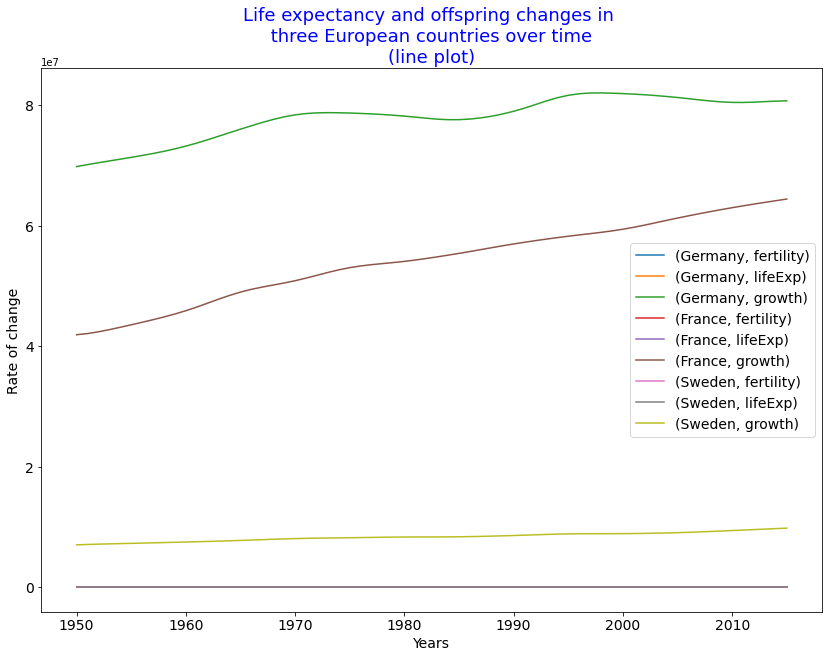

In [44]:
import pylab as plt

colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
df3 = df3.drop(df3.index[0:150])
countries = ['Germany', 'France', 'Sweden']

subset = df3[[countries]]
subset.plot(figsize = (14, 10))
plt.title('Life expectancy and offspring changes in \n three European countries over time \n(line plot)', fontsize=18, color = 'blue')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Rate of change', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.legend( fontsize = 14)
plt.savefig('LifeExpectancy', format="svg")

###### To create a scatterplot, we extract the columns to plot from df2:

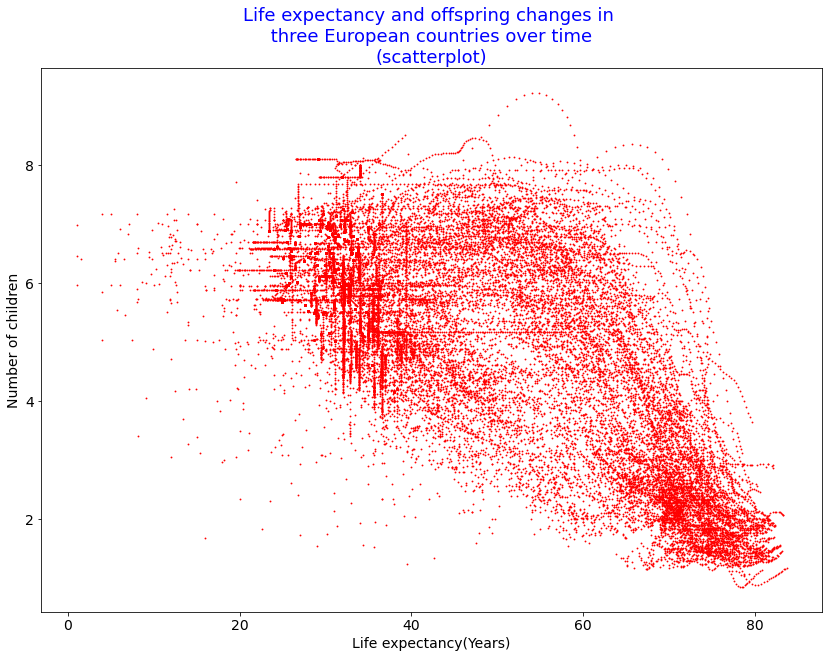

In [34]:
df4 = df2.unstack(2)
df4.plot.scatter('lifeExp', 'fertility', s=0.7, figsize=(14, 10), color='red')
plt.title('Life expectancy and offspring changes over time', fontsize=18, color = 'blue')
plt.xlabel('Life expectancy(Years)', fontsize=14)
plt.ylabel('Number of children', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

###### Using stack and unstack you can also select a year. That makes the plot easier to read:

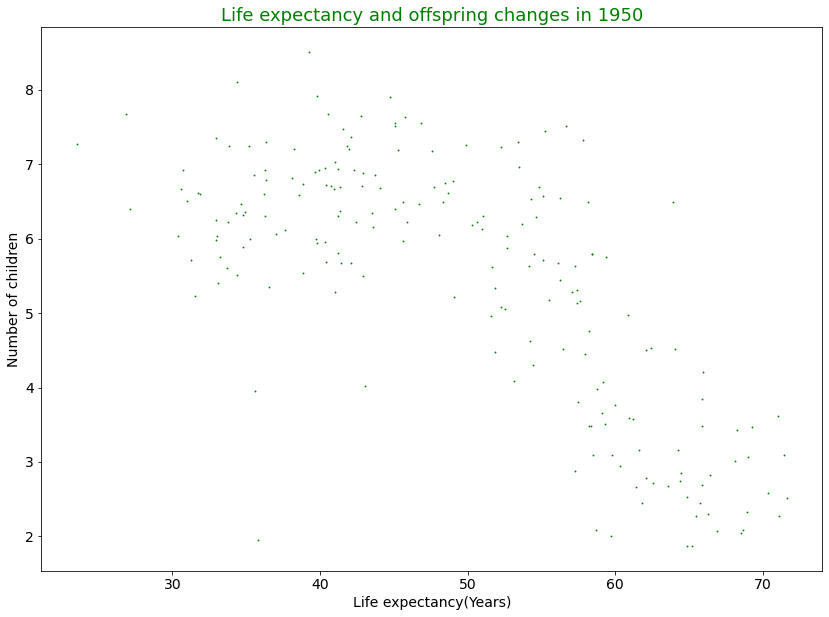

In [73]:
df5 = df2.unstack(1)
year = '1950'
df5 = df5[int(year)]
df5 = df5.unstack(1)

df5.plot.scatter('lifeExp', 'fertility', s=0.7, figsize=(14, 10), color='green')
plt.title('Life expectancy and offspring changes in ' + year, fontsize=18, color = 'green' )
#plt.title('Life expectancy and offspring changes in \n three European countries over time \n(scatterplot)', fontsize=18, color = 'blue')
plt.xlabel('Life expectancy(Years)', fontsize=14)
plt.ylabel('Number of children', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

In [71]:
type(df5)

pandas.core.frame.DataFrame

### Step 10 and 11.  Create an animated scatterplot showing the correlation between life expectancy and fertility, create one plot for each year between 1960 and 2015 (before that, the data contains too many gaps). Adjust the size of the dot by the size of the population. 

**Hint**
Use the function plt.axis((a,b,c,d)) to fix the coordinates of the plot. 

Print the years (range) you want to draw (space separated)
2014 2015
2014 2015


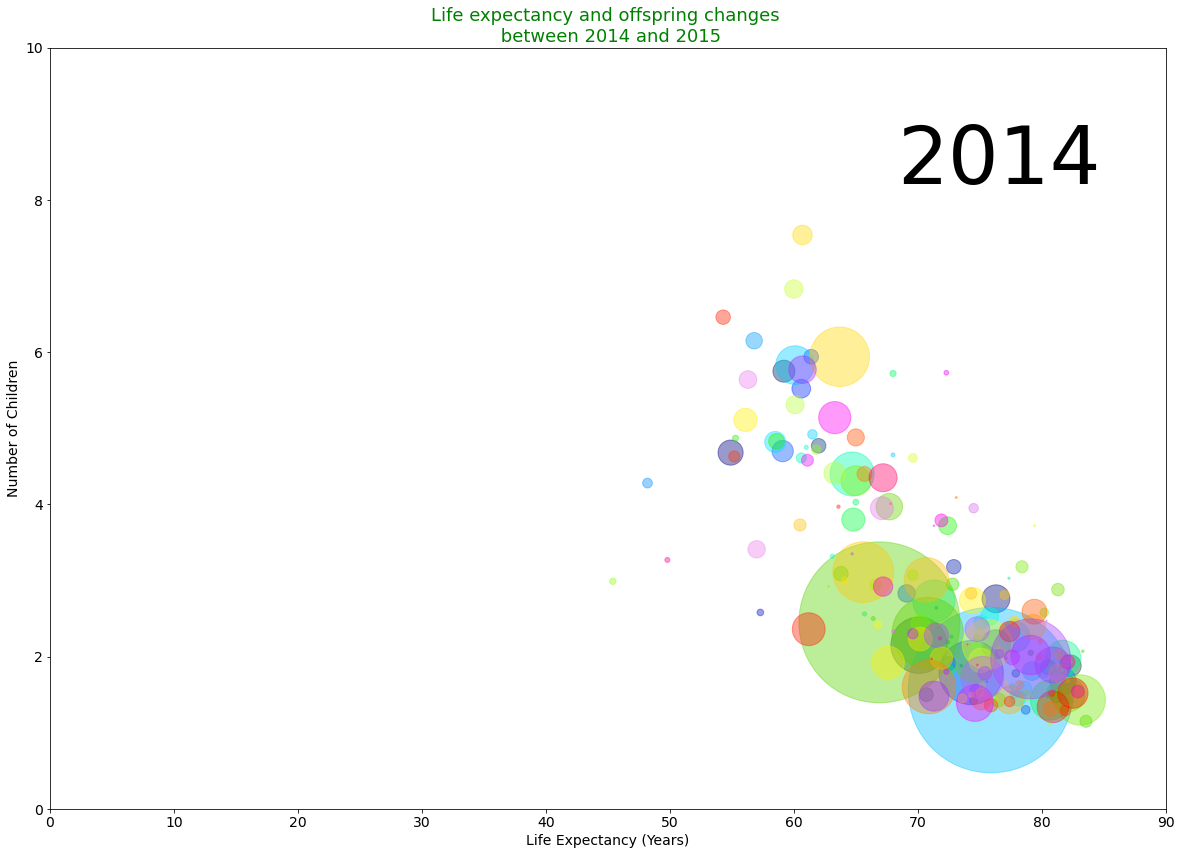

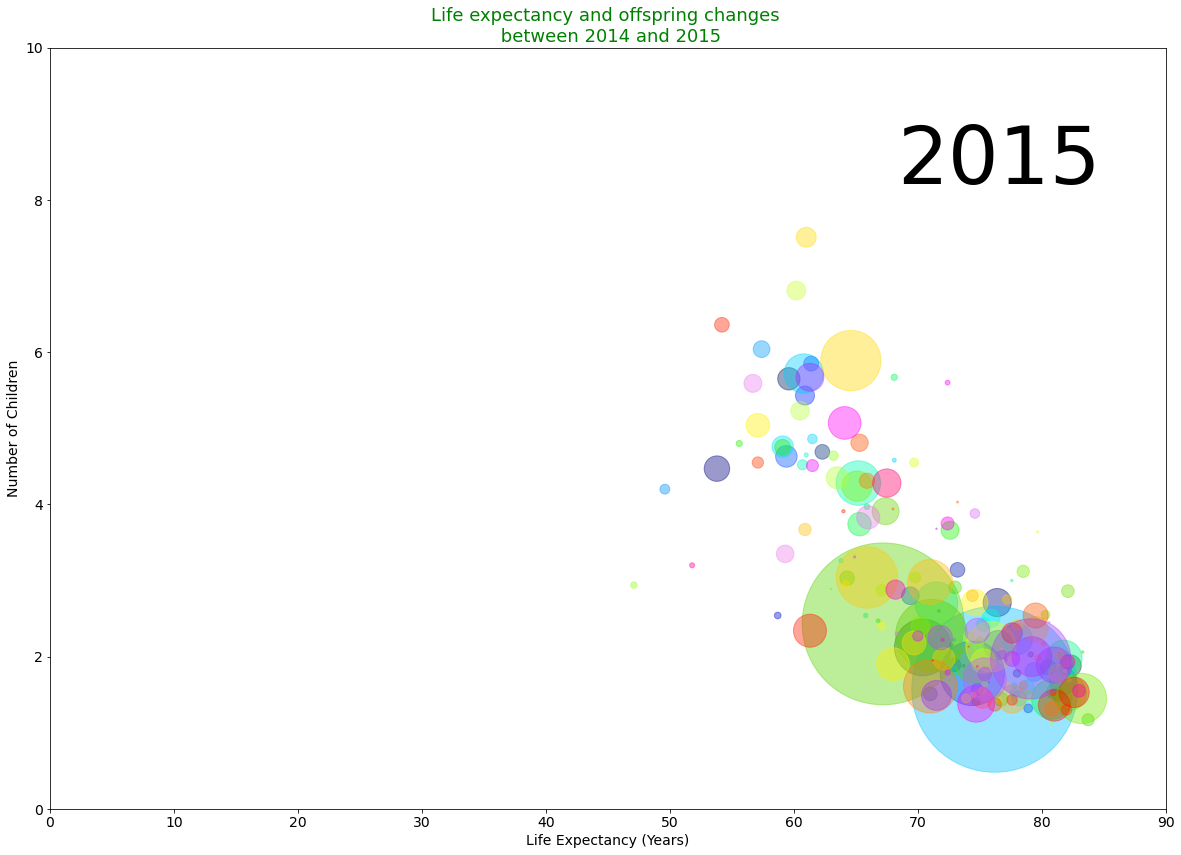

In [79]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
print("Print the years (range) you want to draw (space separated)")
first, last  = input().split()
print(first, last)
df6 = df2.loc[:,first:last]
df6 = df6.unstack(1)

# Define a function that will parse and plot the data
def plotThat(data, year): # change df_n to data
    data = data.unstack(1)
    i = year
    size = data['growth']/50000
    length = data['lifeExp']
    colormap = plt.cm.gist_ncar # creating color map values
    colorst = [colormap(j) for j in np.linspace(0, 0.9,len(length))]
    data.plot.scatter('lifeExp', 'fertility', s=size, figsize=(20, 14), color=colorst, alpha = 0.4)
    plt.xlim(0, 90)
    plt.ylim(0, 10)
    title = 'Life expectancy and offspring changes \n between '+  first + ' and ' + last
    plt.title(title,  fontsize=18, color = 'green')
    # The next seven lines are of use for changing the axis in the 'x' axis
    ax = plt.gca()     # FROM HERE
    #labels = np.arange(int(first), int(last), 5).tolist()
    #x_formatter = FixedFormatter(labels)
    #x_locator = FixedLocator(np.arange(0, 100, 8).tolist())
    #ax.xaxis.set_major_formatter(x_formatter)
    #ax.xaxis.set_major_locator(x_locator)                                              
    plt.text(0.85, 0.85, i, horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes, fontsize= 80)
    plt.xlabel('Life Expectancy (Years)', fontsize=14)
    plt.ylabel('Number of Children', fontsize=14)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    name = 'lifExpec_' + str(i) + '.png' 
    plt.savefig(name, format='png')
     
# Define a function that will parse and plot the data
def animatedScatterPlot(data):
    for i in range(int(first), int(last) + 1):
        df_n = data[i]
        plotThat(df_n, i)
        
animatedScatterPlot(df6)


## Step 12. Adjust the following code example and execute it:

In [28]:
import imageio

images = []

for i in range(1960, 2016):
    filename = '../plots/lifExpec_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('FertilityVsLifeExpectancy.gif', images, fps=5) #Change the frames per second

# Delete all intermediate plots
#!rm *.png

In [75]:
from IPython.display import HTML
HTML('<img src="../plots/FertilityVsLifeExpectancy.gif">')

In [ ]:
## Yey, this was very nice. 